# Categorical Variable Encoding on Iris Dataset

**Import the required Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb 

**Read the data set**

In [2]:
irisDataSet = pd.read_csv("iris.csv")
irisDataSet.head(3)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa


**Drop the first column as it is unwanted**

In [3]:
irisDataSet=irisDataSet.drop(labels ="Unnamed: 0" ,axis = 1)
irisDataSet.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


**Identify the unique elements of the categorical data variable "Species"**

In [4]:
print(irisDataSet['Species'].unique())

['setosa' 'versicolor' 'virginica']


**Count the number of unique elements of the categorical data variable "Species"**

In [5]:
irisDataSet['Species'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: Species, dtype: int64

**Data Pre-processing**

In [6]:
irisDataSet.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

# One hot encoding

In [7]:
iris = irisDataSet.join(pd.get_dummies(irisDataSet.Species))
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0


**Correlation matrix**

In [8]:
# check for highest feature correlation with the target variable
iris.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,setosa,versicolor,virginica
Sepal.Length,1.000000,-0.117570,0.871754,0.817941,-0.717416,0.079396,0.638020
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126,0.603348,-0.467703,-0.135645
Petal.Length,0.871754,-0.428440,1.000000,0.962865,-0.922765,0.201754,0.721011
Petal.Width,0.817941,-0.366126,0.962865,1.000000,-0.887344,0.117899,0.769445
setosa,-0.717416,0.603348,-0.922765,-0.887344,1.000000,-0.500000,-0.500000
versicolor,0.079396,-0.467703,0.201754,0.117899,-0.500000,1.000000,-0.500000
virginica,0.638020,-0.135645,0.721011,0.769445,-0.500000,-0.500000,1.000000


**Data Visualization**

Text(0.5,1,'Linearity Graph between Species and Petal Length')

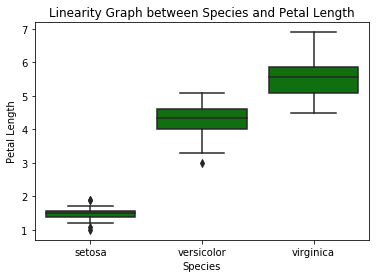

In [9]:
sb.boxplot(iris["Species"],iris["Petal.Length"],color = "green")
plt.xlabel("Species")
plt.ylabel("Petal Length")
plt.title("Linearity Graph between Species and Petal Length")

**Prepare the data for sampling**

In [10]:
X = iris[["Sepal.Length","Sepal.Width","Petal.Width","setosa","versicolor","virginica"]]
Y = iris[["Petal.Length"]]

**Split the data into training and testing sets**

In [11]:
from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state=20)

/home/varshita/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


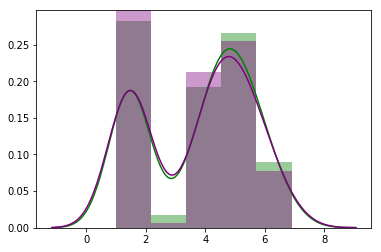

In [12]:
#check if the sampling done is good or bad

sb.distplot(Y,color = "green")
sb.distplot(ytrain,color = "purple")

**Observation : The sampling done is good.**

**Train the model using sklearn LinearRegression**

In [13]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
modelOneHotEncoding = mlr.fit(xtrain, ytrain)


In [14]:
# calculate the coefficient values

b0 = modelOneHotEncoding.intercept_
b = modelOneHotEncoding.coef_

print("The value of intercept is %.3f"%b0)
print("The value of coefficients are ",b)

The value of intercept is 0.238
The value of coefficients are  [[ 0.54661536 -0.13566969  0.61739398 -1.1980553   0.34946012  0.84859518]]


In [15]:
predictOneHotEncoding=modelOneHotEncoding.predict(xtest)

In [16]:
ytest["Predicted"] = predictOneHotEncoding

/home/varshita/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
ytest["Residual"] = ytest['Petal.Length'] - ytest.Predicted

/home/varshita/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
ytest.head()

,Petal.Length,Predicted,Residual
47,1.4,1.243872,0.156128
73,4.7,4.282972,0.417028
74,4.3,4.495129,-0.195129
129,5.8,5.603208,0.196792
67,4.1,4.009075,0.090925


**Model Error calculation**

In [19]:
from sklearn.metrics import mean_absolute_error

errorOneHotEncoding = mean_absolute_error(ytest['Petal.Length'],predictOneHotEncoding)
print("The mean absolute error of the model is %.4f"%errorOneHotEncoding)

The mean absolute error of the model is 0.1778


# Ordinary Least Squares for One Hot Encoding

In [20]:
import statsmodels.api as sm
xconst = sm.add_constant(xtrain)
est = sm.OLS(ytrain,xconst)
estOneHotEncoding = est.fit()
print(estOneHotEncoding.summary())

                            OLS Regression Results                            
Dep. Variable:           Petal.Length   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     1002.
Date:                Thu, 03 Oct 2019   Prob (F-statistic):           2.01e-92
Time:                        21:57:58   Log-Likelihood:                -10.473
No. Observations:                 120   AIC:                             32.95
Df Residuals:                     114   BIC:                             49.67
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1786      0.226      0.789   

/home/varshita/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Label Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris['Label.Encoded.Species'] = le.fit_transform(iris.Species)

In [22]:
iris.head(4)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,setosa,versicolor,virginica,Label.Encoded.Species
0,5.1,3.5,1.4,0.2,setosa,1,0,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0,0


**Prepare the data for sampling**

In [23]:
X = iris[["Sepal.Length","Sepal.Width","Petal.Width","Label.Encoded.Species"]]
Y = iris[["Petal.Length"]]

**Split the data into training and testing sets**

In [24]:
from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state=20)

/home/varshita/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


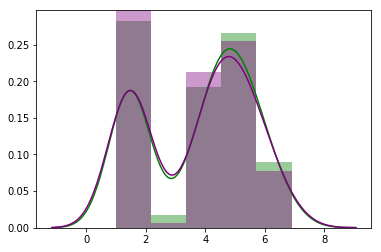

In [25]:
#check if the sampling done is good or bad

sb.distplot(Y,color = "green")
sb.distplot(ytrain,color = "purple")

**Observation : The sampling done is good.**

**Train the model using sklearn LinearRegression**

In [26]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
modelLabelEncoding = mlr.fit(xtrain, ytrain)


In [27]:
# calculate the coefficient values

b0 = modelLabelEncoding.intercept_
b = modelLabelEncoding.coef_

print("The value of intercept is %.3f"%b0)
print("The value of coefficients are ",b)

The value of intercept is -0.118
The value of coefficients are  [[ 0.63907391 -0.52779028  1.11574598  0.41651628]]


In [28]:
predictLabelEncoding=modelLabelEncoding.predict(xtest)

In [29]:
ytest["Predicted"] = predictLabelEncoding

/home/varshita/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
ytest["Residual"] = ytest['Petal.Length'] - ytest.Predicted

/home/varshita/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
ytest.head()

,Petal.Length,Predicted,Residual
47,1.4,1.355569,0.044431
73,4.7,4.057558,0.642442
74,4.3,4.308076,-0.008076
129,5.8,5.517796,0.282204
67,4.1,3.695466,0.404534


**Model Error calculation**

In [32]:
from sklearn.metrics import mean_absolute_error

errorLabelEncoding= mean_absolute_error(ytest['Petal.Length'],predictLabelEncoding)
print("The mean absolute error of the model is %.4f"%errorLabelEncoding)

The mean absolute error of the model is 0.1842


# Ordinary Least Squares for Label Encoding

In [33]:
import statsmodels.api as sm
xconst = sm.add_constant(xtrain)
est = sm.OLS(ytrain,xconst)
estLabelEncoding = est.fit()
print(estLabelEncoding.summary())

                            OLS Regression Results                            
Dep. Variable:           Petal.Length   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     896.2
Date:                Thu, 03 Oct 2019   Prob (F-statistic):           1.18e-85
Time:                        21:58:12   Log-Likelihood:                -30.543
No. Observations:                 120   AIC:                             71.09
Df Residuals:                     115   BIC:                             85.02
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.11

**Observation : The mean absolute error and Adjusted R-squared value of One hot encoding is lower than that of Label Encoding.**